## Training a simple model from scratch

In [1]:
from keras import layers,models,optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


Original images are 720x480 but training using original dimensions will take a long time. Let's start off using 320x213 images.

In [2]:
IMAGE_WIDTH = 320
IMAGE_HEIGHT = 213

Defining a function to return our simple 6-layer model.

In [17]:
def build_model(image_width=IMAGE_WIDTH, image_height=IMAGE_HEIGHT):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                            input_shape=(image_width, image_height, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    
    return model

In [3]:
TRAIN_DIR = '../data/train'
VALIDATION_DIR = '../data/test'

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='binary')

Found 94 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [40]:
model = build_model()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=4,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=4)
model.save('model_no_aug.h5')

Epoch 1/30
4/4 [==============================] - 10s 2s/step - loss: 0.6751 - acc: 0.5764 - val_loss: 0.6749 - val_acc: 0.6000
Epoch 2/30
4/4 [==============================] - 9s 2s/step - loss: 0.6575 - acc: 0.6950 - val_loss: 0.6594 - val_acc: 0.6000
Epoch 3/30
4/4 [==============================] - 9s 2s/step - loss: 0.6015 - acc: 0.6993 - val_loss: 0.6493 - val_acc: 0.6000
Epoch 4/30
4/4 [==============================] - 9s 2s/step - loss: 0.6122 - acc: 0.6500 - val_loss: 0.7266 - val_acc: 0.6000
Epoch 5/30
4/4 [==============================] - 9s 2s/step - loss: 0.6284 - acc: 0.6186 - val_loss: 0.6243 - val_acc: 0.6000
Epoch 6/30
4/4 [==============================] - 9s 2s/step - loss: 0.5384 - acc: 0.7118 - val_loss: 0.9319 - val_acc: 0.6000
Epoch 7/30
4/4 [==============================] - 9s 2s/step - loss: 0.6835 - acc: 0.6125 - val_loss: 0.6131 - val_acc: 0.7200
Epoch 8/30
4/4 [==============================] - 9s 2s/step - loss: 0.5305 - acc: 0.7417 - val_loss: 0.5988 -

Graphing the result

In [14]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

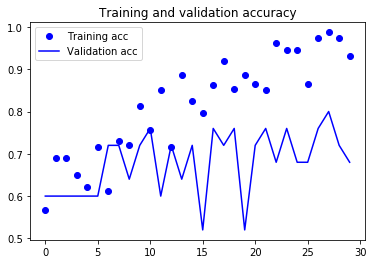

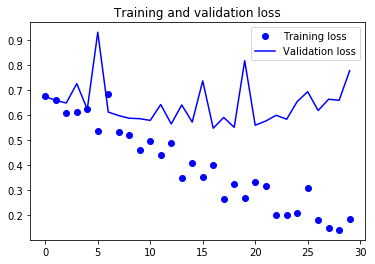

In [46]:
plot_history(history)

We see that validation loss is all over the place, and there's a considerable gap between it and training loss. This happens because our dataset is very small. Let's try augmenting it by randomly applying transformations to training data and increasing our batch size.

In [6]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='binary')

Found 94 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

NameError: name 'model' is not defined

## Using Pre Trained CNNs

In [7]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3))

In [8]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 320, 213, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 213, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 213, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 106, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 106, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 106, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 53, 128)       0         
__________

In [9]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# Train only the dense layers.
conv_base.trainable = False

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        VALIDATION_DIR,
        target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
        batch_size=20,
        class_mode='binary')

Found 94 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=25)

Epoch 1/20
50/50 [==============================] - 440s 9s/step - loss: 0.5789 - acc: 0.7045 - val_loss: 0.5237 - val_acc: 0.7187
Epoch 2/20
50/50 [==============================] - 441s 9s/step - loss: 0.5012 - acc: 0.7555 - val_loss: 0.4879 - val_acc: 0.7594
Epoch 3/20
50/50 [==============================] - 495s 10s/step - loss: 0.4685 - acc: 0.7950 - val_loss: 0.4939 - val_acc: 0.7594
Epoch 4/20
50/50 [==============================] - 500s 10s/step - loss: 0.4156 - acc: 0.8163 - val_loss: 0.4831 - val_acc: 0.8406
Epoch 5/20
50/50 [==============================] - 486s 10s/step - loss: 0.3981 - acc: 0.8207 - val_loss: 0.4616 - val_acc: 0.8000
Epoch 6/20
50/50 [==============================] - 495s 10s/step - loss: 0.3681 - acc: 0.8433 - val_loss: 0.4743 - val_acc: 0.7969
Epoch 7/20
50/50 [==============================] - 498s 10s/step - loss: 0.3458 - acc: 0.8644 - val_loss: 0.5038 - val_acc: 0.7187
Epoch 8/20
50/50 [==============================] - 463s 9s/step - loss: 0.317

In [13]:
model.save('pretrained_vgg.h5')

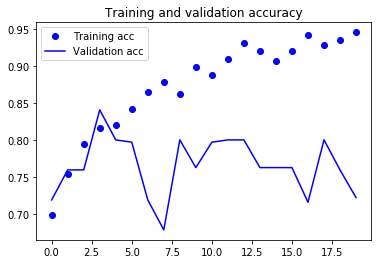

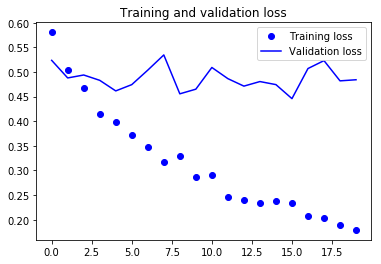

In [15]:
plot_history(history)